In [1]:
import pandas as pd
import numpy as np

# Librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bank = pd.read_csv('../data/bank-cleaned.csv')
pd.set_option('display.max_columns', None)
df_bank.sample(3)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
36342,36509,28.0,services,single,basic.6y,0.0,0.0,0.0,cellular,385,2,4,1,success,-2.9,92.963,-40.8,1.260,5076.2,yes,2017-11-26,28.373,-106.018,10c1579d-e6fd-4bd7-950c-311987c7c9d5
5079,5176,51.0,management,married,university.degree,0.0,1.0,0.0,telephone,317,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2016-09-01,41.435,-116.716,e3fab353-4140-44a1-8080-e7eac44085ce
17635,17732,47.0,technician,married,basic.9y,0.0,NaN,NaN,cellular,1569,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,2018-09-10,46.282,-119.094,9e99eae5-77d7-4e7b-a9ba-4f08a4a6a893


In [3]:
df = df_bank.copy()

Pendiente:
 - Nombre de columna id_ to ID
 - una vez sin nulos, modificar "age", "default", "housing", "loan" a int
 - Eliminamos columnas inncesarias: "unnamed:0", "latitud", "longitud"
 - Modificar valores unicos no representativos/outliers

# Modificar el nombre de la columna *id_*

In [4]:
df.rename(columns={"id_": "ID"}, inplace=True)

# Eliminamos columnas "unnamed:0", "latitud", "longitud"

In [5]:
eliminar_columnas = ["Unnamed: 0", "latitude", "longitude"]

In [6]:
df.drop(columns=eliminar_columnas, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  float64
 15  cons.conf.idx   43000 non-null  float64
 16  euribor3m       33744 non-null  float64
 17  nr.employed     43000 non-null 

# Gestion de nulos

Primero recordemos la cantidad de nulos que hay en las columnas:

In [8]:
nulos = df.isna().mean() * 100
nulos.sort_values(ascending=False)

euribor3m         21.525581
default           20.886047
age               11.906977
education          4.202326
housing            2.386047
loan               2.386047
cons.price.idx     1.095349
job                0.802326
date               0.576744
marital            0.197674
campaign           0.000000
contact            0.000000
duration           0.000000
poutcome           0.000000
previous           0.000000
pdays              0.000000
emp.var.rate       0.000000
cons.conf.idx      0.000000
nr.employed        0.000000
y                  0.000000
ID                 0.000000
dtype: float64

Para la gestion de nulos primero vamos a visualizar la distitribucion de las categorías para conocer los outliers

### Visualización de columnas numéricas

In [9]:
columnas_numericas = df.select_dtypes(include=['number']).columns
columnas_numericas

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [10]:
def subplot_col_num (dataframe):
    col_nums = dataframe.select_dtypes(include="number").columns
    num_graph = len(col_nums)
    num_rows = (num_graph + 2)// 2

    fig, axes = plt.subplots(num_graph, 2, figsize=(15, num_rows*5))

    for i, col in enumerate(col_nums):
        sns.histplot(data=dataframe, x=col, ax=axes[i,0], bins=200)
        axes[i,0].set_title(f"Distribución de {col}")
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel("Frecuencia")

        sns.boxplot(data=dataframe, x=col, ax =axes[i,1])
        axes[i,1].set_title(f"Boxplot de {col}")

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

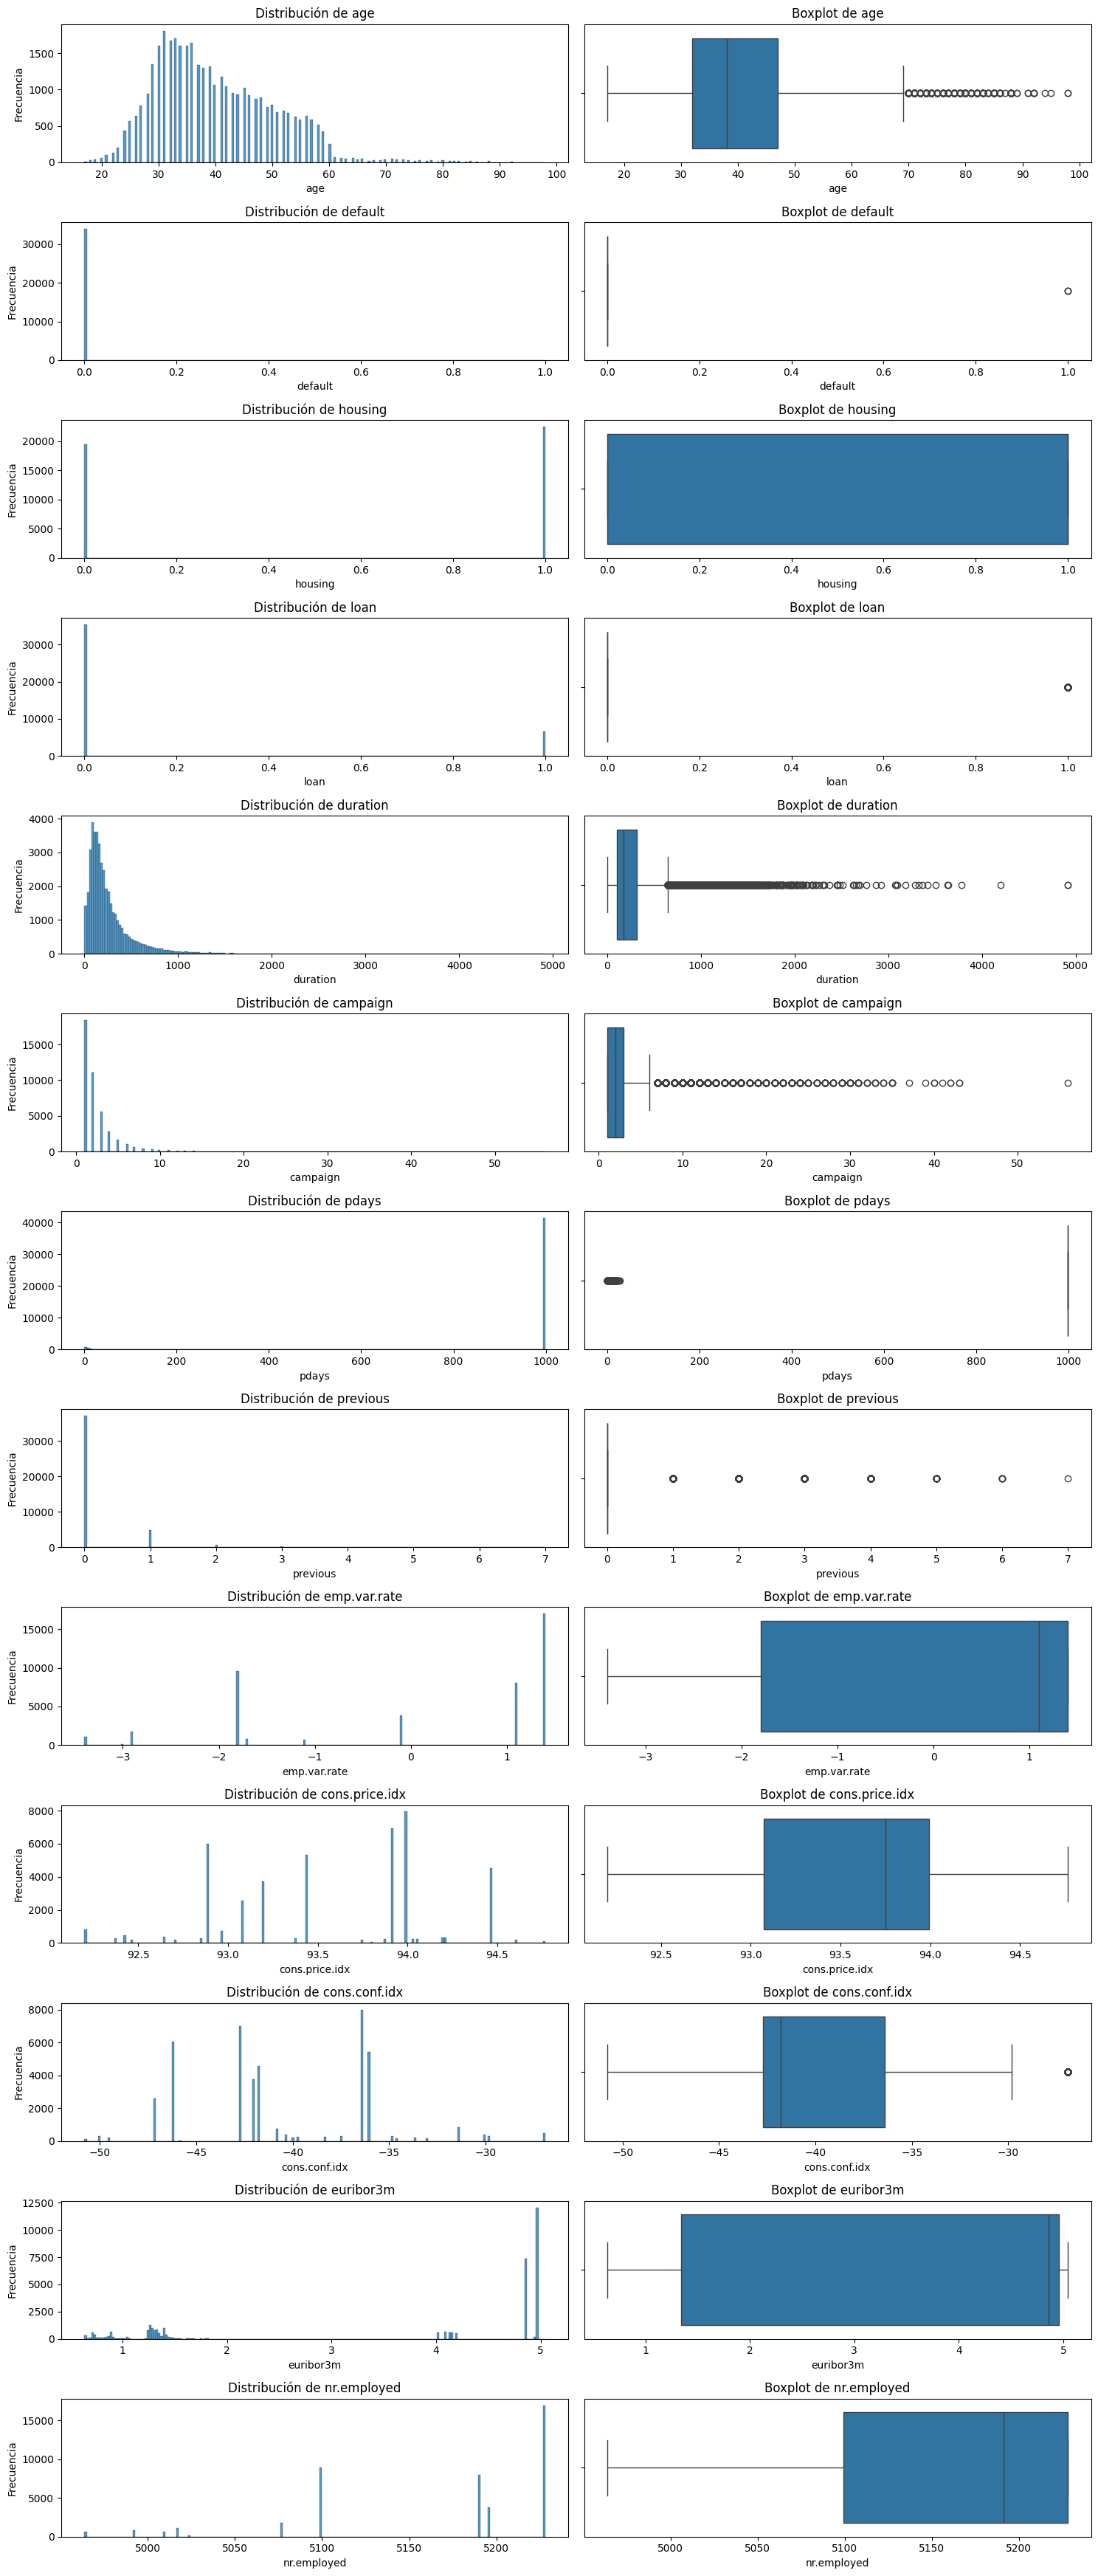

In [11]:
subplot_col_num (df)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.000,32.000,38.000,47.000,98.000
default,34019.0,0.000088,0.009390,0.000,0.000,0.000,0.000,1.000
housing,41974.0,0.535998,0.498708,0.000,0.000,1.000,1.000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.000,0.000,0.000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.000,999.000,999.000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.000,0.000,0.000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,42529.0,93.574219,0.579548,92.201,93.075,93.749,93.994,94.767


Una vez visualizadas las distribuciones y los boxplots de las columnas numéricas, vamos a ver si estas columnas con nulos tienen outliers evidentes que puedan estar afectando el análisis.

In [13]:
def calculo_outliers(df, cols):
    for col in cols:
        q_75 = df[col].quantile(0.75)
        q_25 = df[col].quantile(0.25)
        rango_itq= q_75- q_25
        inferior = q_25-(rango_itq*1.5)
        superior= q_75 +(rango_itq*1.5)
        outliers = df[(df[col]< inferior) | (df[col]> superior)]
        num_outliers = len(outliers)
        per_outliers = num_outliers/df.shape[0]*100

        print(f"En la columna {col.upper()} tenemos un total de {num_outliers} outliers, lo que representa un {per_outliers} % del total")

In [14]:
calculo_outliers(df, ['age','euribor3m','cons.price.idx'])

En la columna AGE tenemos un total de 441 outliers, lo que representa un 1.0255813953488373 % del total
En la columna EURIBOR3M tenemos un total de 0 outliers, lo que representa un 0.0 % del total
En la columna CONS.PRICE.IDX tenemos un total de 0 outliers, lo que representa un 0.0 % del total


- Dado que los valores de outliers para "age" son un porcentaje muy bajo del total sabiendo que la mayoria de los datos se encuentran entre 30 y 50 pero algunos con mas de 70, podemos *cambiar los valores nulos por la mediana*
- CONS.PRICE.IDX no hay outliers por lo que se podría usar media/mediana aunque en este caso reemplzamos nulos por *mediana*.
- EURIBOR3M - no hay outliers pero tiene valores extremos por lo que usaremos la *mediana*

In [15]:
reemplazar_mediana = ['age', 'cons.price.idx', 'euribor3m']


In [16]:
for col in reemplazar_mediana:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

In [17]:
df.isnull().sum().sort_values(ascending=False).head(7)

default      8981
education    1807
housing      1026
loan         1026
job           345
date          248
marital        85
dtype: int64

Para las columnas con datos booleanos, para las que no podemos hablar de outliers ya que los datos solo tienen dos valores "0" y "1" diremos que en el caso de:
- "default" como vemos en el gráfico la mayoria de los valores son "0"
- "housing" parece estar repartido ente "0" y "1"
- "loan"  la mayor cantidad de valores esta en el "0"

In [18]:
columnas_boo = ["default", "housing", "loan"]
for col in columnas_boo:
    print (col.upper())
    display(df[col].value_counts(dropna=False)/df.shape[0]*100)
    print("\n")

DEFAULT


default
0.0    79.106977
NaN    20.886047
1.0     0.006977
Name: count, dtype: float64



HOUSING


housing
1.0    52.320930
0.0    45.293023
NaN     2.386047
Name: count, dtype: float64



LOAN


loan
0.0    82.423256
1.0    15.190698
NaN     2.386047
Name: count, dtype: float64

En base a esta distribucion de nulos:
 - *Default* : crearemos un valor para los nulos con "no registrado"
 - *Housing* : dado que el valor más común es "1" y hay un porcentaje muy bajo de nulos, sustituiremos los valores nulos por su moda
 - *Loan* : dado que el valor más común es "0" y hay un porcentaje muy bajo de nulos,sustituiremos los valores nulos por su moda

In [19]:
df["housing"] = df["housing"].fillna(df["housing"].mode()[0])

df["loan"] = df["loan"].fillna(df["loan"].mode()[0])


In [20]:
df["default"] =df["default"].fillna("no registrado")

In [21]:
df.isnull().sum().sort_values(ascending=False).head(4)

education    1807
job           345
date          248
marital        85
dtype: int64

Una vez gestionados los valores nulos de las columnas categoricas vamos a modificar el tipo de dato de "float" a "int" de las columnas ["housing","loan"]

In [22]:
df["housing"] = df["housing"].astype("float64")

df["loan"] = df["loan"].astype("float64")

Para no tener diferente tipos de datos como valores, vamos a modificar el 0 y 1 por "no" y "si" 

In [23]:
df["default"] = df["default"].replace({0.0: "No", 1.0: "Sí"})

In [24]:
df.sample(4)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,ID
36684,29.0,services,single,professional.course,No,1.0,0.0,telephone,161,2,999,0,nonexistent,-2.9,92.963,-40.8,1.252,5076.2,no,2015-11-14,2e3e8026-bc02-439f-b239-7e6c927c32ed
36245,38.0,NaN,single,university.degree,No,0.0,0.0,cellular,119,1,3,2,success,-2.9,92.963,-40.8,4.857,5076.2,yes,2017-09-03,0f8f465a-3bf4-482a-a428-fe04f0e890dd
15756,44.0,blue-collar,married,basic.9y,no registrado,0.0,0.0,cellular,147,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,2015-09-03,155f747d-a324-4ae6-8ee1-057a2e92c4c2
31064,39.0,blue-collar,single,basic.6y,no registrado,0.0,0.0,cellular,47,1,999,1,failure,-1.8,92.893,-46.2,4.857,5099.1,no,2016-05-31,a025c635-5e15-46b5-98f0-24ebbf0ab7ec


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  float64
 6   loan            43000 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  43000 non-null  float64
 15  cons.conf.idx   43000 non-null  float64
 16  euribor3m       43000 non-null  float64
 17  nr.employed     43000 non-null 

In [26]:
df.select_dtypes(include="object").columns

Index(['job', 'marital', 'education', 'default', 'contact', 'poutcome', 'y',
       'date', 'ID'],
      dtype='object')

# Visualizacion de las columnas categoricas

In [35]:
def subplot_col_cat (dataframe, cols):

    """
    Genera countplots solo para las columnas indicadas.
    """
    
    # Filtrar solo columnas que existen
    cols = [c for c in cols if c in dataframe.columns]

    if len(cols) == 0:
        return "No hay columnas categóricas en el DataFrame"
    
    #configurar el tamaño de la figura

    num_cols = len(cols)
    rows = (num_cols+2) // 3 #calcular fiilas necesarias para 3 columnas for fila
    fig, axes = plt.subplots(rows, 3, figsize =(15, rows *5))
    axes = axes.flatten() # convertir a eje plano

    #generar grafico para cada columna categorica:

    for i, col in enumerate(cols):
        sns.countplot( data= dataframe, x=col, ax=axes[i], hue=col, legend =False)
        axes[i].set_title(f"Distribucion de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis="x", rotation=90)
    #eliminar ejes sobrantes si hay menos columnas que subplots

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    #ajustar diseño
    plt.tight_layout()
    plt.show() 

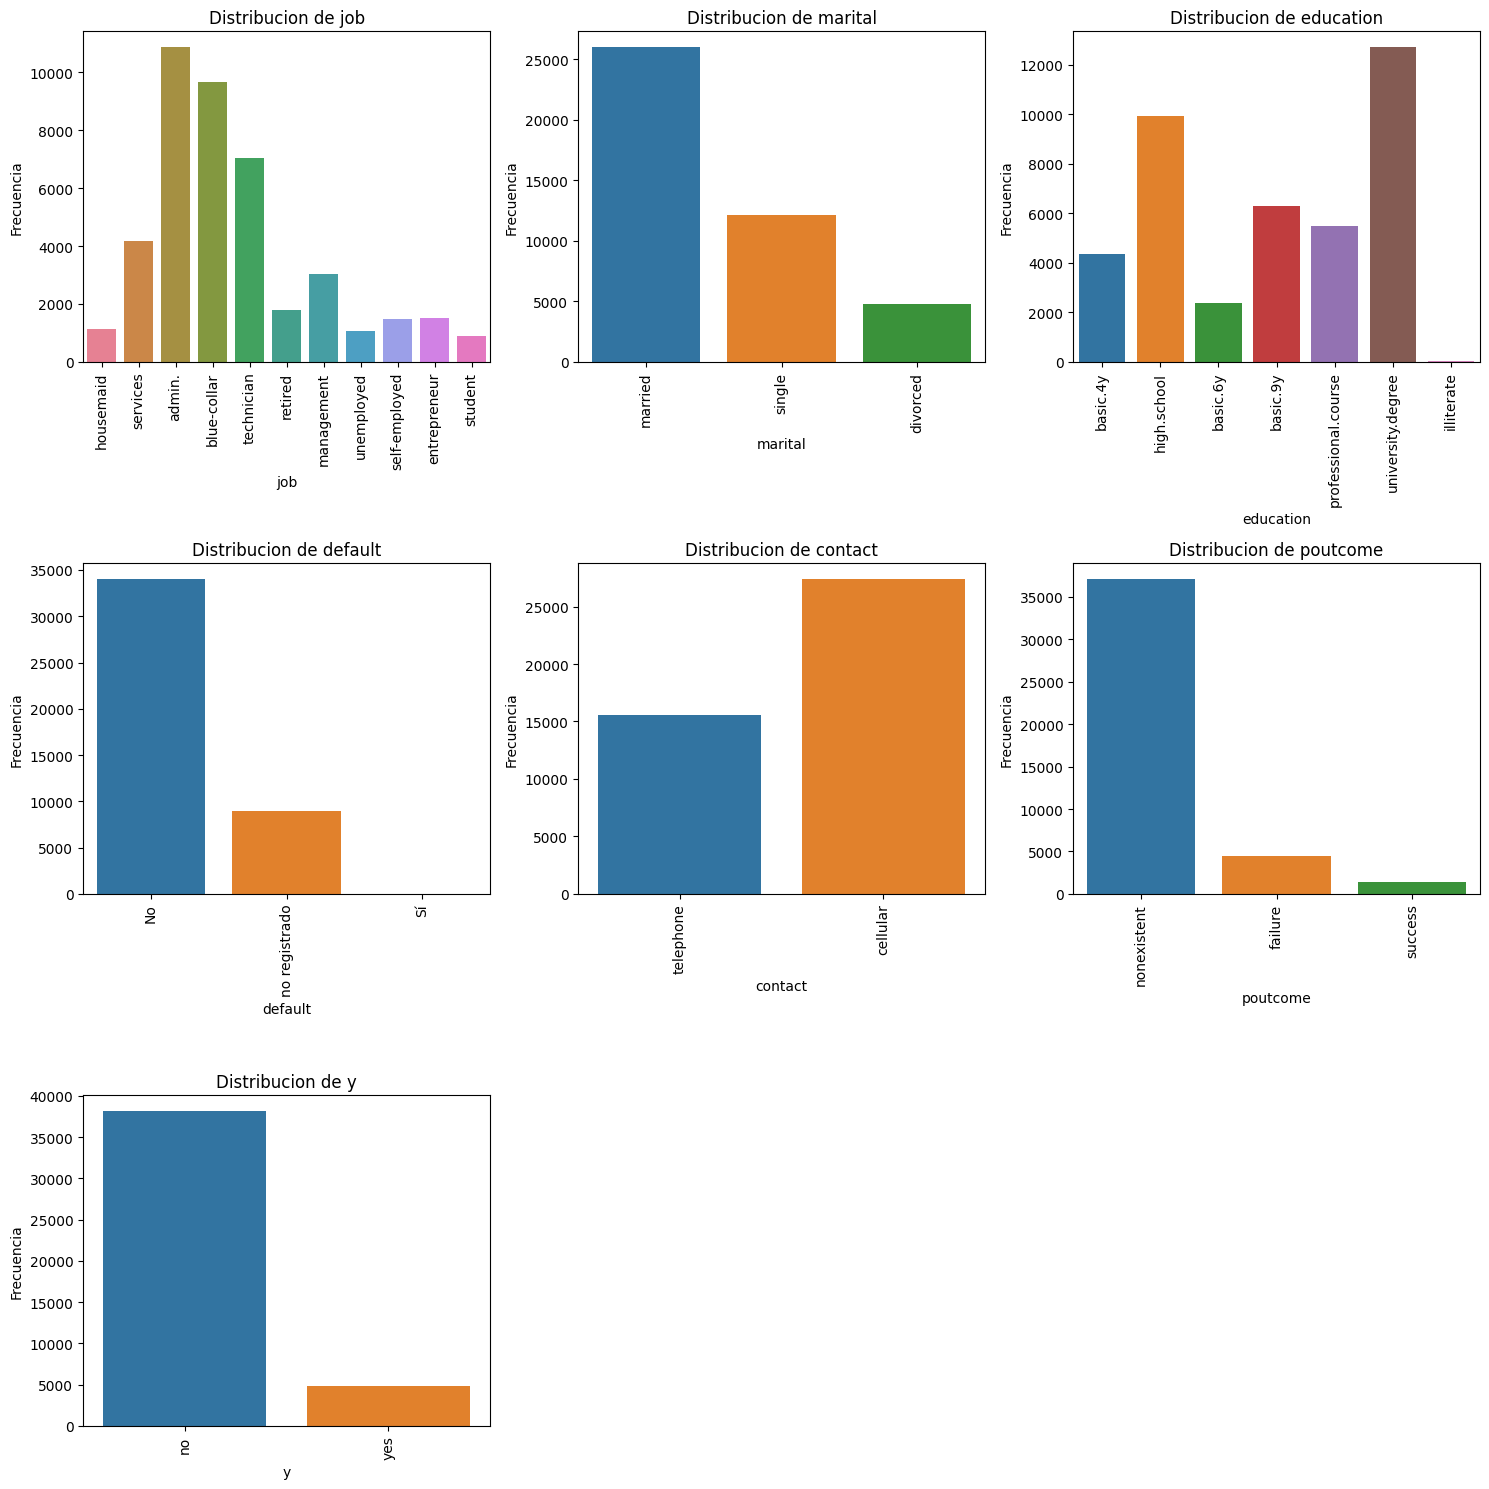

In [36]:
subplot_col_cat(df, ['job', 'marital', 'education', 'default', 'contact', 'poutcome', 'y'])

siendo aun las columnas con valores nulos:

education    1807  

job           345  

date          248 

marital        85 

In [42]:
nulos = df.isnull().mean()*100 
nulos.sort_values(ascending=False).head(4)

education    4.202326
job          0.802326
date         0.576744
marital      0.197674
dtype: float64

Para estas columnas con nulos, en base al porcentaje de nulos que tenemos haremos lo siguiente:
- Education: serán sustuidos por "unknown"
- Job : moda
- Date: cambiar a datetime y sustituis a mediana
- Marital: moda

In [43]:
df["date"] = df["date"].astype("datetime64[ns]")

In [47]:
df["date"] = df["date"].fillna(df["date"].median())

In [44]:
df["education"] = df["education"].fillna("unknown")

In [45]:
df["job"] = df["job"].fillna(df["job"].mode()[0])

In [46]:
df["marital"] = df["marital"].fillna(df["marital"].mode()[0])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             43000 non-null  float64       
 1   job             43000 non-null  object        
 2   marital         43000 non-null  object        
 3   education       43000 non-null  object        
 4   default         43000 non-null  object        
 5   housing         43000 non-null  int64         
 6   loan            43000 non-null  int64         
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  43000 non-null  float64       
 15  co

In [54]:
df["housing"] = df["housing"].astype("int64")

In [56]:
df["loan"] = df["loan"].astype("int64")

In [58]:
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,ID
30292,21.0,student,single,unknown,No,1,1,cellular,374,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes,2018-03-19,154091ac-49ea-4568-b9a7-53dc10e32722
42607,32.0,student,single,university.degree,No,1,0,cellular,197,2,999,1,failure,-2.9,92.963,-40.8,4.857,5076.2,no,2018-03-25,184f2b85-1419-4ec0-8ba7-b9c979336360
6081,46.0,admin.,divorced,university.degree,No,1,0,telephone,376,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2015-02-16,2042e0ad-8334-4c17-ad66-b26e2484540f


# Revisión de valores de columnas

Para la columna "pdays" en la representación visual hemos visto que los valores están entorno al 0 pero un gran volumen de datos se centra en el 999, con lo que se intuye que este dato viene a significar un "no contacto" con el cliente dado que el significado general de esta columna es número de días que han pasado desde la ultima vez que se contacto con el cliente durante esta campaña. 

In [60]:
df["pdays"].value_counts().sort_index()

pdays
0         15
1         26
2         63
3        457
4        121
5         50
6        428
7         66
8         20
9         67
10        55
11        30
12        61
13        38
14        22
15        26
16        13
17        10
18         7
19         3
20         1
21         2
22         4
25         1
26         1
27         1
999    41412
Name: count, dtype: int64

Si tenemos en cuenta que la campaña es durante un mes, resulta coherente que haya valores entre el 0 (no han pasado dias desde que se ha contactado con el cliente - ha podido ser hoy) y el día 27, pero tenemos el valor 999 que puede significar que no ha habido contacto con el cliente, aunque tambien podría significar valor 0, pero dado que no tenemos más informacion vamos a dejar el valor 0 y modificar el 999 como "no contactado".

In [61]:
df["pdays"] = df["pdays"].replace(999, "no contacted")

In [63]:
columnas_a_modificar = ["duration", "campaign", "previous"]

Duration

In [89]:
df["duration"].value_counts().sort_index()

duration
0        4
1        3
2        1
3        4
4       11
        ..
3631     1
3643     1
3785     1
4199     1
4918     2
Name: count, Length: 1540, dtype: int64

In [86]:
df["duration"].mode()[0]

np.int64(90)

In [90]:
df["duration"].median()

np.float64(179.0)

Teniendo en cuenta que la moda y mediana están entre 90 y 179, vamos a comprobar cuantos datos hay por encima de 1000 segundos (aprox 16 minutos de llamada):
- Como hemos comprobado para mayor de 1000 hay un total de valores de 987 
- Para mayor de 2000s hay una cantidad de 59 valores.

In [134]:
df[df["duration"] > 750]["duration"].value_counts().sum()

np.int64(2147)

In [139]:
df[df["duration"] > 1269.02]["duration"].value_counts().sum()

np.int64(430)

In [132]:
p_90_duration = df["duration"].quantile (0.90)
p_90_duration

np.float64(549.0)

In [135]:
p_95_duration = df["duration"].quantile (0.95)
p_95_duration

np.float64(750.0)

In [136]:
p_99_duration = df["duration"].quantile (0.99)
p_99_duration

np.float64(1269.020000000004)

Calculado el percentel 0.99 conociendo que el valor es 1269 sabemos que por encima de dicha duracion solo hay valores, cuyos valores son demasiado altos, considerados outliers en base al resto de valores. Por lo que procederemos a winsorizar los valores outliers por encima del valor del percentil por dicho valor.

In [140]:

df["duration_reduce"] = df["duration"].where(
    df["duration"] <= p_99_duration, p_99_duration)

In [150]:
df[df["duration"] > 1269.02].sample(2)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,ID,campaign_reduce,duration_reduce
2647,27.0,admin.,single,high.school,No,1,0,telephone,1328,1,no contacted,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,yes,2016-10-26,01dce3c9-647e-4073-b09b-bf9a4f58c310,1,1269.02
29769,28.0,admin.,single,high.school,No,0,0,cellular,1333,5,no contacted,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes,2019-02-15,075eb983-b74b-4de0-b38c-3ffea0942545,5,1269.02


In [ ]:
columnas_boo = ["default", "housing", "loan"]
for col in columnas_boo:
    print (col.upper())
    display(df[col].value_counts(dropna=False)/df.shape[0]*100)
    print("\n")

DEFAULT


default
0.0    79.106977
NaN    20.886047
1.0     0.006977
Name: count, dtype: float64



HOUSING


housing
1.0    52.320930
0.0    45.293023
NaN     2.386047
Name: count, dtype: float64



LOAN


loan
0.0    82.423256
1.0    15.190698
NaN     2.386047
Name: count, dtype: float64

Campaign (El número de contactos realizados durante esta campaña para este cliente.)
Analizamos los valores y el numero de valores, el máximo para ver si hay outliers, revisamos en el caso de outliers el percentil 90 y 99, una vez revisada la cantidad de valores de outliers decideremos el valor por el que queremos sustituir los outliers para que la media y la desviación no se vean alteradas 

In [107]:
df["campaign"].value_counts().sort_index()

campaign
1     18404
2     11048
3      5584
4      2777
5      1658
6      1025
7       658
8       418
9       289
10      236
11      183
12      130
13       94
14       73
15       51
16       51
17       61
18       34
19       26
20       30
21       26
22       17
23       20
24       18
25        8
26        8
27       11
28        8
29       10
30       10
31        8
32        4
33        4
34        3
35        5
37        1
39        1
40        2
41        1
42        2
43        2
56        1
Name: count, dtype: int64

In [111]:
df["campaign"].median()

np.float64(2.0)

In [110]:
df["campaign"].mode()[0]

np.int64(1)

In [121]:
df[df["campaign"] > 5]["campaign"].value_counts().sum()

np.int64(3529)

In [118]:
p_90 = df["campaign"].quantile (0.90)
p_90

np.float64(5.0)

In [119]:
p_95 = df["campaign"].quantile (0.95)
p_95

np.float64(7.0)

In [125]:

df["campaign_reduce"] = df["campaign"].where(
    df["campaign"] <= p_95,
    p_95
)


In [130]:
display(df["campaign_reduce"].mean())
display(df["campaign"].mean())

np.float64(2.3332093023255815)

np.float64(2.5672325581395348)

Previous

In [151]:
df["previous"].value_counts()

previous
0    37103
1     4778
2      786
3      232
4       75
5       20
6        5
7        1
Name: count, dtype: int64

In [156]:
q_99_previous = df["previous"].quantile(0.99)

In [159]:
q_99_previous

np.float64(2.0)

In [158]:
df[df["previous"]>q_99_previous]["previous"].value_counts().sum()

np.int64(333)

In [160]:
df["previous_reduce"] = df["previous"].where(df["previous"]<= q_99_previous, q_99_previous)

In [166]:
df[df["previous"] > q_99_previous].sample(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,ID,campaign_reduce,duration_reduce,previous_reduce
41532,45.0,blue-collar,married,high.school,No,1,1,cellular,449,2,5,3,success,-1.1,94.767,-50.8,1.050,4963.6,yes,2017-08-29,81974113-2ce4-4546-938b-f97c0c5b2c9c,2,449.0,2
40269,47.0,management,married,university.degree,No,1,0,cellular,182,2,no contacted,6,failure,-1.7,94.027,-38.3,0.904,4991.6,no,2016-11-28,6cc3f219-99b5-41d9-87c1-4070b7155ab9,2,182.0,2


In [167]:
"""def valores_nulos (df):
    for col in df.select_dtypes(include="number").columns:
        if df[col].isnull().sum()>0:
            df[col] = df[col].fillna(df[col].median())
valores_nulos (df)"""

'def valores_nulos (df):\n    for col in df.select_dtypes(include="number").columns:\n        if df[col].isnull().sum()>0:\n            df[col] = df[col].fillna(df[col].median())\nvalores_nulos (df)'

In [171]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,43000.0,39.741698,17.0,33.0,38.0,46.0,98.0,9.817735
housing,43000.0,0.54707,0.0,0.0,1.0,1.0,1.0,0.497785
loan,43000.0,0.151907,0.0,0.0,0.0,0.0,1.0,0.358935
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
emp.var.rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
cons.price.idx,43000.0,93.576134,92.201,93.075,93.749,93.994,94.767,0.576652
cons.conf.idx,43000.0,-40.509049,-50.8,-42.7,-41.8,-36.4,-26.9,4.637186
euribor3m,43000.0,3.883541,0.634,1.466,4.857,4.959,5.045,1.621095


In [169]:
df["date"]=pd.to_datetime(df["date"])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   age              43000 non-null  float64       
 1   job              43000 non-null  object        
 2   marital          43000 non-null  object        
 3   education        43000 non-null  object        
 4   default          43000 non-null  object        
 5   housing          43000 non-null  int64         
 6   loan             43000 non-null  int64         
 7   contact          43000 non-null  object        
 8   duration         43000 non-null  int64         
 9   campaign         43000 non-null  int64         
 10  pdays            43000 non-null  object        
 11  previous         43000 non-null  int64         
 12  poutcome         43000 non-null  object        
 13  emp.var.rate     43000 non-null  float64       
 14  cons.price.idx   43000 non-null  float